<a href="https://www.kaggle.com/code/prasadmeesala/ad-diagnosis?scriptVersionId=146676733" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Importing the Necessary Libraries and Frameworks

In [81]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics

import tensorflow as tf

In [2]:
warnings.filterwarnings("ignore")

### Loading, Analyzing and Visualizing the data

In [3]:
# path = os.path.join("CDataset_2")

# datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255.0)

# data = datagen.flow_from_directory(directory = path, target_size = (128, 128), batch_size = 20000)

In [4]:
# X = data[0][0]
# y = data[0][1]

In [5]:
# # Converting images from rgb to grayscale

# X_gray = np.zeros(shape = (X.shape[0], X.shape[1], X.shape[2], 1))

# for i, x in enumerate(X):
#     X_gray[i] = tf.image.rgb_to_grayscale(x)

# print(X_gray.shape)

In [6]:
# # Converting from dense matrix to sparse matrix

# y = np.array([np.argmax(y_) for y_ in y])   

# print(y.shape)

In [7]:
# np.save(file = "X_arr_gray_final", arr = X_gray)
# np.save(file = "y_arr_labels_final", arr = y)

In [8]:
X = np.load(file = "/kaggle/input/alzheimers-dataset/X_arr_gray_final.npy")
y = np.load(file = "/kaggle/input/alzheimers-dataset/y_arr_labels_final.npy")

In [9]:
print(X.shape, y.shape)

(17368, 128, 128, 1) (17368,)


In [10]:
y_label_counts = pd.Series(y).value_counts()
y_label_counts

2    7840
0    5289
1    4239
Name: count, dtype: int64

In [11]:
labels = ['AD', 'CI', 'CN']

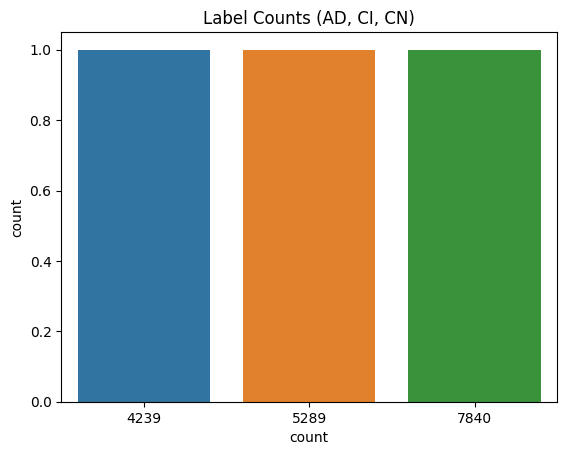

In [12]:
plt.title("Label Counts (AD, CI, CN)")
sns.countplot(x = y_label_counts)
plt.show()

CI


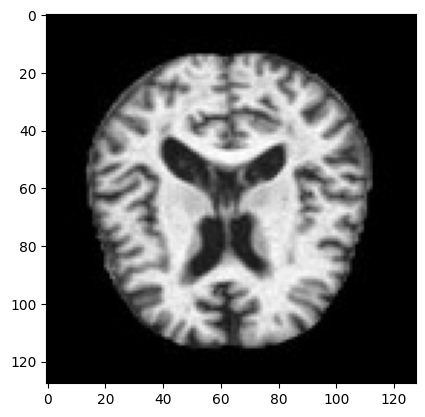

AD


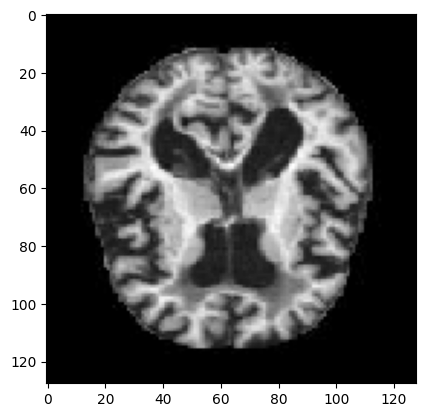

CN


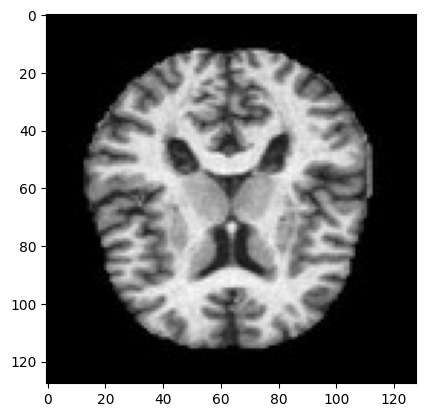

In [13]:
# Visualizing the images

for idx, img in enumerate(X[:3]):
    print(labels[y[idx]])
    plt.imshow(img, cmap = "gray")
    plt.show()

### Data Preparation

In [14]:
# Splitting the data into train, validation and test sets ( Stratification )

X_train_val, X_test, y_train_val, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 3, stratify = y)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 3, stratify = y_train_val)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(11115, 128, 128, 1) (3474, 128, 128, 1) (2779, 128, 128, 1)
(11115,) (3474,) (2779,)


In [15]:
y_train_label_counts = pd.Series(y_train).value_counts()
y_test_label_counts = pd.Series(y_test).value_counts()
y_val_label_counts = pd.Series(y_val).value_counts()

print("Training Set : ", y_train_label_counts, "Testing Set : ", y_test_label_counts, "Validation Set : ", y_val_label_counts, sep = "\n\n")

Training Set : 

2    5017
0    3385
1    2713
Name: count, dtype: int64

Testing Set : 

2    1568
0    1058
1     848
Name: count, dtype: int64

Validation Set : 

2    1255
0     846
1     678
Name: count, dtype: int64


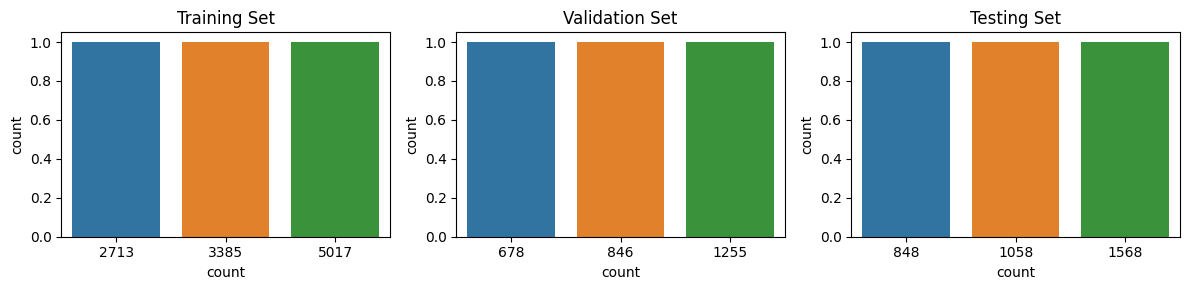

In [16]:
# Visualizing the uniform distribution of each label in different sets

plt.figure(figsize = (12, 3))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.countplot(x = y_train_label_counts)

plt.subplot(1, 3, 2)
plt.title("Validation Set")
sns.countplot(x = y_val_label_counts)

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.countplot(x = y_test_label_counts)

plt.tight_layout()
plt.show()

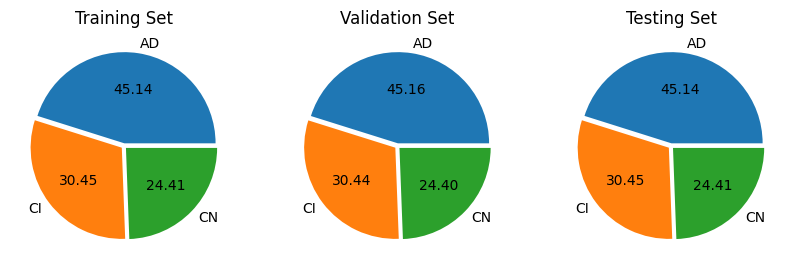

In [17]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 3, 1)
plt.title("Training Set")
plt.pie(y_train_label_counts, labels = labels, autopct = "%.2f", explode = [0.03, 0.03, 0.03])

plt.subplot(1, 3, 2)
plt.title("Validation Set")
plt.pie(y_val_label_counts, labels = labels, autopct = "%.2f", explode = [0.03, 0.03, 0.03])

plt.subplot(1, 3, 3)
plt.title("Testing Set")
plt.pie(y_test_label_counts, labels = labels, autopct = "%.2f", explode = [0.03, 0.03, 0.03])
plt.show()

### Training the Model and Evaluating it's Performance

In [18]:
# Training a Convolutional Neural Network

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 100, input_shape = X_train[0].shape, activation = "relu", kernel_size = (3, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 3, activation = "softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 100)     1000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 100)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 176400)            0         
                                                                 
 dense (Dense)               (None, 3)                 529203    
                                                                 
Total params: 530,203
Trainable params: 530,203
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [40]:
callbacks_list = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_val, y_val), callbacks = callbacks_list)

Epoch 1/100
348/348 [==============================] - 4s 11ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9755
Epoch 2/100
348/348 [==============================] - 4s 10ms/step - loss: 6.2919e-04 - accuracy: 1.0000 - val_loss: 0.0809 - val_accuracy: 0.9748
Epoch 3/100
348/348 [==============================] - 4s 11ms/step - loss: 4.9110e-04 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9737
Epoch 4/100
348/348 [==============================] - 4s 10ms/step - loss: 3.9159e-04 - accuracy: 1.0000 - val_loss: 0.0852 - val_accuracy: 0.9755
Epoch 5/100
348/348 [==============================] - 3s 10ms/step - loss: 3.2347e-04 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9748
Epoch 6/100
348/348 [==============================] - 4s 10ms/step - loss: 2.6629e-04 - accuracy: 1.0000 - val_loss: 0.0823 - val_accuracy: 0.9737
Epoch 7/100
348/348 [==============================] - 3s 10ms/step - loss: 2.3541e-04 - accuracy: 1.0000 - val_loss

In [41]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


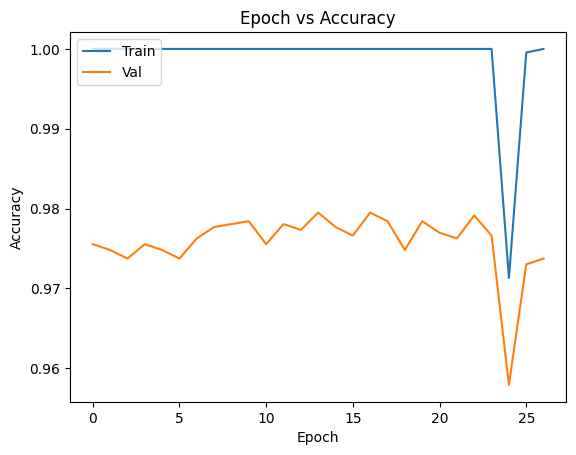

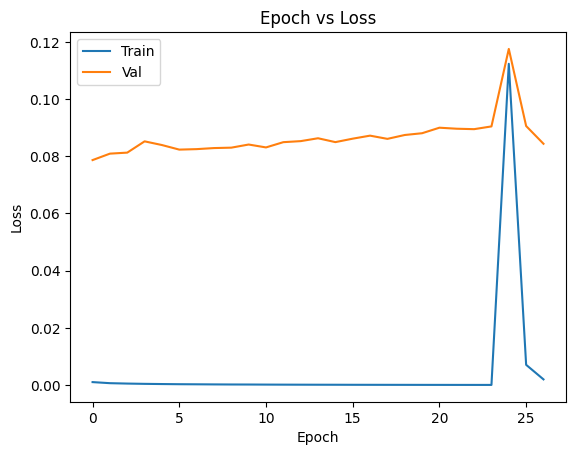

In [42]:
# Plotting Learning Curves

plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Epoch vs Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [43]:
# Evaluating the model on train set

loss, acc = model.evaluate(X_train, y_train)

348/348 [==============================] - 1s 4ms/step - loss: 0.0014 - accuracy: 1.0000


In [44]:
# Evaluating the model on validation set

loss, acc = model.evaluate(X_val, y_val)

87/87 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.9737


In [45]:
# Making predictions on train set

y_train_pred = model.predict(X_train)
y_train_pred_labels = np.array([np.argmax(y_) for y_ in y_train_pred])

348/348 [==============================] - 1s 3ms/step


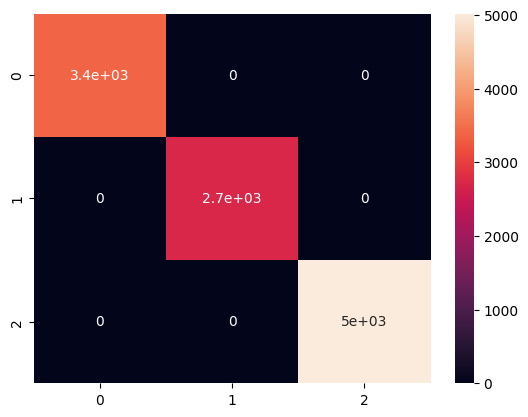

In [69]:
# Confusion Matrix

cm = tf.math.confusion_matrix(labels = y_train, predictions = y_train_pred_labels).numpy()

sns.heatmap(cm, annot = True)
plt.show()

In [70]:
# Classification metrics

accuracy = metrics.accuracy_score(y_train, y_train_pred_labels)
precision = metrics.precision_score(y_train, y_train_pred_labels, average = "weighted")
recall = metrics.recall_score(y_train, y_train_pred_labels, average = "weighted")
f1 = metrics.f1_score(y_train, y_train_pred_labels, average = "weighted")

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nRecall : {recall}\nF1 Score : {f1}")

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 1.0


In [71]:
# Classification report

clf_report = metrics.classification_report(y_train, y_train_pred_labels)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3385
           1       1.00      1.00      1.00      2713
           2       1.00      1.00      1.00      5017

    accuracy                           1.00     11115
   macro avg       1.00      1.00      1.00     11115
weighted avg       1.00      1.00      1.00     11115



### Validating the Model

In [72]:
# Evaluating the model on test set

loss, acc = model.evaluate(X_test, y_test)

109/109 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 0.9747


In [73]:
# Making predictions on test set

y_test_pred = model.predict(X_test)
y_test_pred_labels = np.array([np.argmax(y_) for y_ in y_test_pred])

109/109 [==============================] - 0s 3ms/step


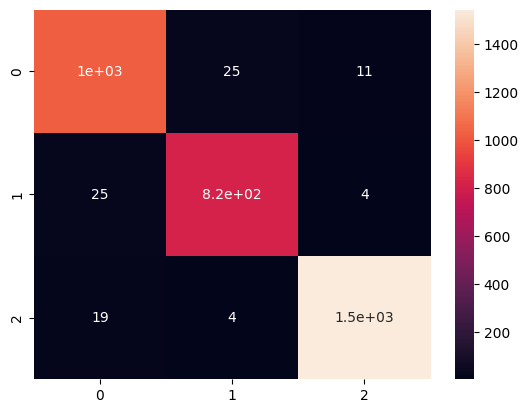

In [74]:
# Confusion Matrix

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_test_pred_labels).numpy()

sns.heatmap(cm, annot = True)
plt.show()

In [75]:
tp_0, tn_0 = cm[0][0], cm[1][1] + cm[1][2] + cm[2][1] + cm[2][2]
fp_0, fn_0 = cm[1][0] + cm[2][0], cm[0][1] + cm[0][2]

tp_1, tn_1 = cm[1][1], cm[0][0] + cm[0][2] + cm[2][0] + cm[2][2]
fp_1, fn_1 = cm[0][1] + cm[2][1], cm[1][0] + cm[1][2]

tp_2, tn_2 = cm[2][2], cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]
fp_2, fn_2 = cm[0][2] + cm[1][2], cm[2][0] + cm[2][1]

def describeCM(tp, tn, fp, fn, i):
    print(f"\n\nClass {labels[i]} : \n")
    print(f"True Positives : {tp}\nTrue Negatives : {tn}\nFalse Positives : {fp}\nFalse Negatives : {fn}")
    precision, recall = tp / (tp + fp), tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    print(f"\nPrecision : {precision}\nRecall (Sensitivity) : {recall}\nF1-Score : {f1}")
    
describeCM(tp_0, tn_0, fp_0, fn_0, 0)
describeCM(tp_1, tn_1, fp_1, fn_1, 1)
describeCM(tp_2, tn_2, fp_2, fn_2, 2)



Class AD : 

True Positives : 1022
True Negatives : 2372
False Positives : 44
False Negatives : 36

Precision : 0.9587242026266416
Recall (Sensitivity) : 0.9659735349716446
F1-Score : 0.9623352165725048


Class CI : 

True Positives : 819
True Negatives : 2597
False Positives : 29
False Negatives : 29

Precision : 0.9658018867924528
Recall (Sensitivity) : 0.9658018867924528
F1-Score : 0.9658018867924528


Class CN : 

True Positives : 1545
True Negatives : 1891
False Positives : 15
False Negatives : 23

Precision : 0.9903846153846154
Recall (Sensitivity) : 0.9853316326530612
F1-Score : 0.9878516624040921


In [76]:
# Classification metrics

accuracy = metrics.accuracy_score(y_test, y_test_pred_labels)
precision = metrics.precision_score(y_test, y_test_pred_labels, average = "weighted")
recall = metrics.recall_score(y_test, y_test_pred_labels, average = "weighted")
f1 = metrics.f1_score(y_test, y_test_pred_labels, average = "weighted")

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nRecall : {recall}\nF1 Score : {f1}")

Accuracy : 0.9746689694876224
Precision : 0.9747418777495865
Recall : 0.9746689694876224
F1 Score : 0.97469834939071


In [77]:
# Classification report

clf_report = metrics.classification_report(y_test, y_test_pred_labels)
print(clf_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1058
           1       0.97      0.97      0.97       848
           2       0.99      0.99      0.99      1568

    accuracy                           0.97      3474
   macro avg       0.97      0.97      0.97      3474
weighted avg       0.97      0.97      0.97      3474



### Saving the model into memory

In [78]:
model.save("clf_model_1.h5")

1/1 [==============================] - 0s 18ms/step
Prediction :  AD


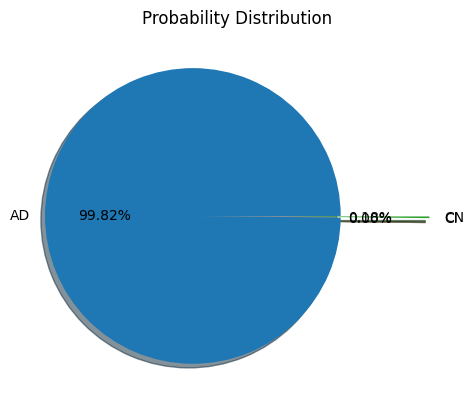

In [79]:
sample_prediction = model.predict(X_test[7:8])[0]

y_pred_label = labels[np.argmax(sample_prediction)]
print("Prediction : ", y_pred_label)

plt.title("Probability Distribution")
plt.pie(sample_prediction, labels = labels, autopct = "%.2f%%", explode = [0.3, 0.3, 0.3], shadow = True)
plt.show()

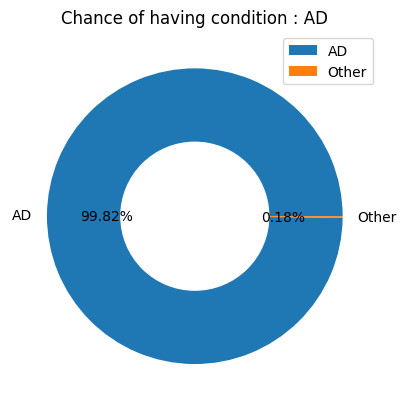

In [80]:
fig, ax = plt.subplots()

ax.set_title(f"Chance of having condition : {labels[np.argmax(sample_prediction)]}")
ax.pie([sample_prediction.max(), sample_prediction[sample_prediction != sample_prediction.max()].sum()], 
       labels = [labels[np.argmax(sample_prediction)], 'Other'], autopct = "%.2f%%")
center_circle = plt.Circle((0, 0), radius = 0.5, color = 'white')
fig.gca().add_artist(center_circle)
plt.legend()

plt.show()